## Indian Cuisine Analysis : Authenticity

In [2]:
import json
import pandas as pd
from collections import Counter
from Graph_Helpers import *
import seaborn as sns
import itertools

from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

from adjustText import adjust_text
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from collections import Counter


## plot PCA for Indian cuisines

In [3]:
region2spiceingre_df_combined = pd.read_csv("../Data/region2spiceingre_df_combined.csv",index_col='spice')

In [4]:
region2spiceingre_df_combined.head()

,Andhra,Bengali,Goan,Gujarati,Hyderabadi,Jain,Karnataka,Kashmiri,Kerala,Maharashtrian,Mughlai,Parsi,Punjabi,Rajasthani,Sindhi,South Indian,Tamil Nadu,Uttar Pradesh
spice,,,,,,,,,,,,,,,,,,
Chilli,0.846154,0.623656,0.807692,0.811409,0.764706,0.698413,0.768,0.617021,0.771654,0.703857,0.609524,0.803922,0.798809,0.763566,0.750000,0.741440,0.775148,0.500000
Cumin,0.365385,0.290323,0.487179,0.448196,0.482353,0.393651,0.256,0.340426,0.212598,0.396694,0.333333,0.588235,0.415619,0.507752,0.409091,0.292798,0.266272,0.368421
Coriander,0.500000,0.340502,0.512821,0.564610,0.611765,0.444444,0.456,0.191489,0.425197,0.528926,0.485714,0.627451,0.563203,0.538760,0.613636,0.420307,0.431953,0.342105
Cabbage,0.000000,0.021505,0.012821,0.023283,0.011765,0.047619,0.000,0.000000,0.007874,0.004132,0.009524,0.000000,0.021178,0.007752,0.000000,0.036600,0.005917,0.000000
Onion,0.500000,0.336918,0.717949,0.138533,0.652941,0.025397,0.400,0.340426,0.401575,0.340220,0.447619,0.647059,0.498345,0.282946,0.568182,0.331759,0.343195,0.271930


In [ ]:
def myplot(score,coeff,label_sample, labels=None, dist = 'euclidean'):
    from scipy.spatial.distance import cdist
    pc_ob=[0,1]
    print('score shape', score.shape)
    xs = score[:,pc_ob[0]]
    ys = score[:,pc_ob[1]]
    n = coeff.shape[0]
    #scalex = 1.0/(xs.max() - xs.min())
    #scaley = 1.0/(ys.max() - ys.min())
    #plt.scatter(xs * scalex,ys * scaley)
    plt.scatter(xs ,ys )
    dist = cdist(coeff[:,pc_ob], [(0,0)], dist)
    distcomp= np.sort(dist, axis=0)[::-1][20]# plot top 30 loadings
    textall=[]
    #print(n)
    for i in range(n):
        if dist[i]> distcomp:
            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = [0.1, 0.2, 0.3],alpha = 0.5)
            if labels is None:
                plt.text(coeff[i,0]* 1.0, coeff[i,1] * 1.0, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
            else:
                textall.append(plt.text(coeff[i,pc_ob[0]]* 1.0, coeff[i,pc_ob[1]] * 1.0, labels[i], color = 'g', ha = 'center',
                                        va = 'center', 
                         fontsize=12))
    #adjust_text(textall)
    
    #textall=[]

    for i in range( len(label_sample)):
        textall.append(plt.text(xs[i]*1, ys[i]*1, label_sample[i], fontsize=14))
    adjust_text(textall)
    #plt.xlim(-1,1)
    #plt.ylim(-1,1)
    print (pca.explained_variance_ratio_)
    plt.xlabel("PC{} ({:.2f}%)".format(pc_ob[0]+1, pca.explained_variance_ratio_[0]*100), fontsize= 14)
    plt.ylabel("PC{} ({:.2f}%)".format(pc_ob[1]+1, pca.explained_variance_ratio_[1]*100), fontsize=14)
    plt.grid()


score shape (18, 3)
[0.37863121 0.24703921 0.13786401]


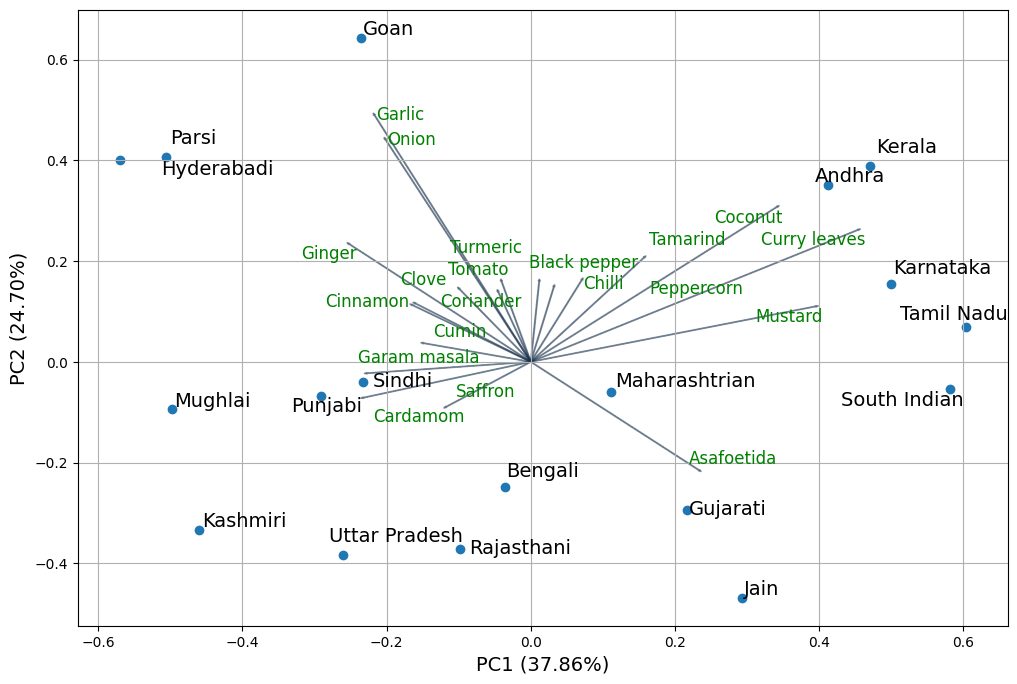

In [7]:

plotvar = region2spiceingre_df_combined.loc[:, region2spiceingre_df_combined.columns!= 'Random']
n_components=3
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(plotvar.T)


    #Call the function. Use only the 2 PCs.
plt.figure(figsize=(12, 8))
myplot(principalComponents[:,0:n_components],np.transpose(pca.components_[0:n_components, :]), plotvar.columns, plotvar.index)

plt.savefig("../Figures/PCA_Indiancuisines1_2.png")
plt.show()


## calculating cosine distance between cuisines using PCs

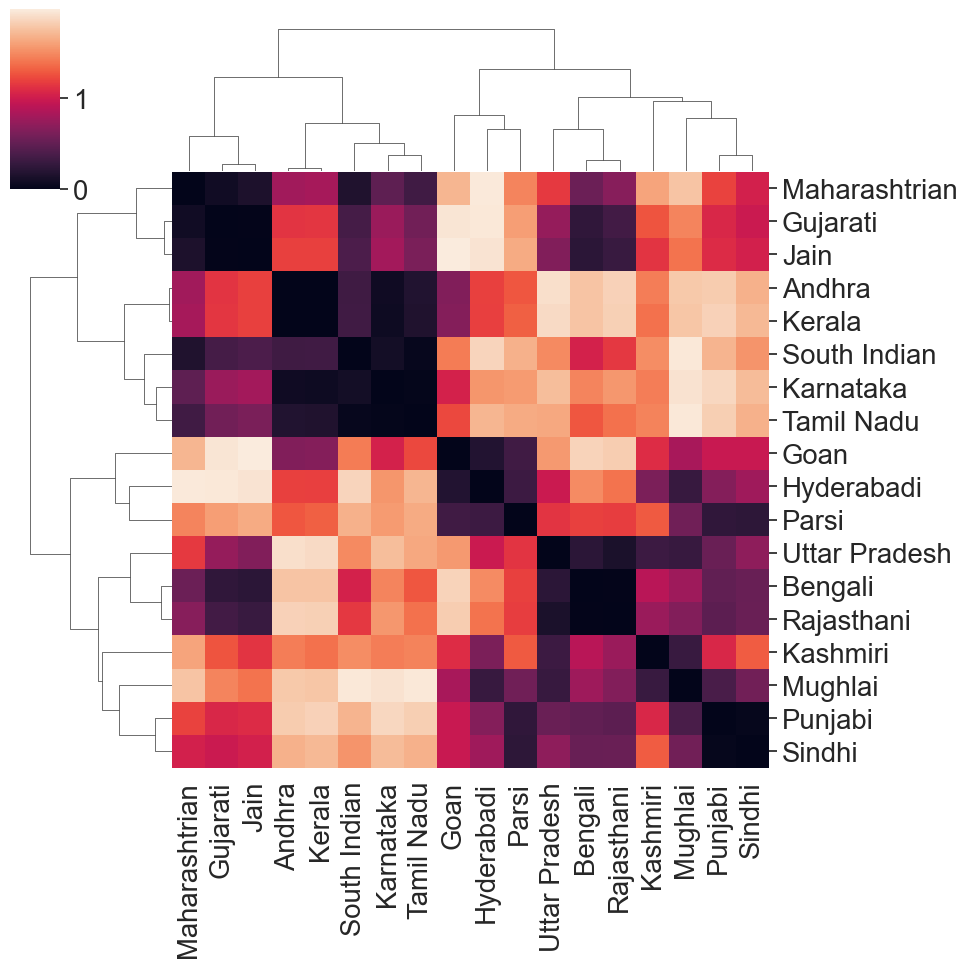

In [8]:
temp1 =cdist(principalComponents, principalComponents, 'cosine')

n = temp1.shape[0]
temp1[range(n), range(n)] = 0
Sim_cuisine1 = pd.DataFrame(temp1, columns= plotvar.columns, index=plotvar.columns )

Sim_cuisine1.idxmax()
sns.set(font_scale=1.8)
sns.clustermap(Sim_cuisine1, cmap = sns.cm.rocket, annot_kws={"size": 20})
plt.savefig("../Figures/clustermap_Indiancuisine.png")

## find authentic spices for each cuisine

prevalence  of each ingredient i in a cuisine c as , where  is the number of recipes that contain the particular ingredient i in the cuisine and Nc is the total number of recipes in the cuisine. 


The relative prevalence  measures the authenticity—the difference between the prevalence of i in cuisine c and the average prevalence of i in all other cuisines.

In [9]:
region2spiceingre_df_combined.rename(str.capitalize, axis='index', inplace=True)
region2spiceingre_df_combined

,Andhra,Bengali,Goan,Gujarati,Hyderabadi,Jain,Karnataka,Kashmiri,Kerala,Maharashtrian,Mughlai,Parsi,Punjabi,Rajasthani,Sindhi,South Indian,Tamil Nadu,Uttar Pradesh
spice,,,,,,,,,,,,,,,,,,
Chilli,0.846154,0.623656,0.807692,0.811409,0.764706,0.698413,0.768,0.617021,0.771654,0.703857,0.609524,0.803922,0.798809,0.763566,0.750000,0.741440,0.775148,0.500000
Cumin,0.365385,0.290323,0.487179,0.448196,0.482353,0.393651,0.256,0.340426,0.212598,0.396694,0.333333,0.588235,0.415619,0.507752,0.409091,0.292798,0.266272,0.368421
Coriander,0.500000,0.340502,0.512821,0.564610,0.611765,0.444444,0.456,0.191489,0.425197,0.528926,0.485714,0.627451,0.563203,0.538760,0.613636,0.420307,0.431953,0.342105
Cabbage,0.000000,0.021505,0.012821,0.023283,0.011765,0.047619,0.000,0.000000,0.007874,0.004132,0.009524,0.000000,0.021178,0.007752,0.000000,0.036600,0.005917,0.000000
Onion,0.500000,0.336918,0.717949,0.138533,0.652941,0.025397,0.400,0.340426,0.401575,0.340220,0.447619,0.647059,0.498345,0.282946,0.568182,0.331759,0.343195,0.271930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Panch phoran powder,0.000000,0.014337,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kitchen king masala,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Lovage,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005917,0.000000


## find top spices for each cuisine

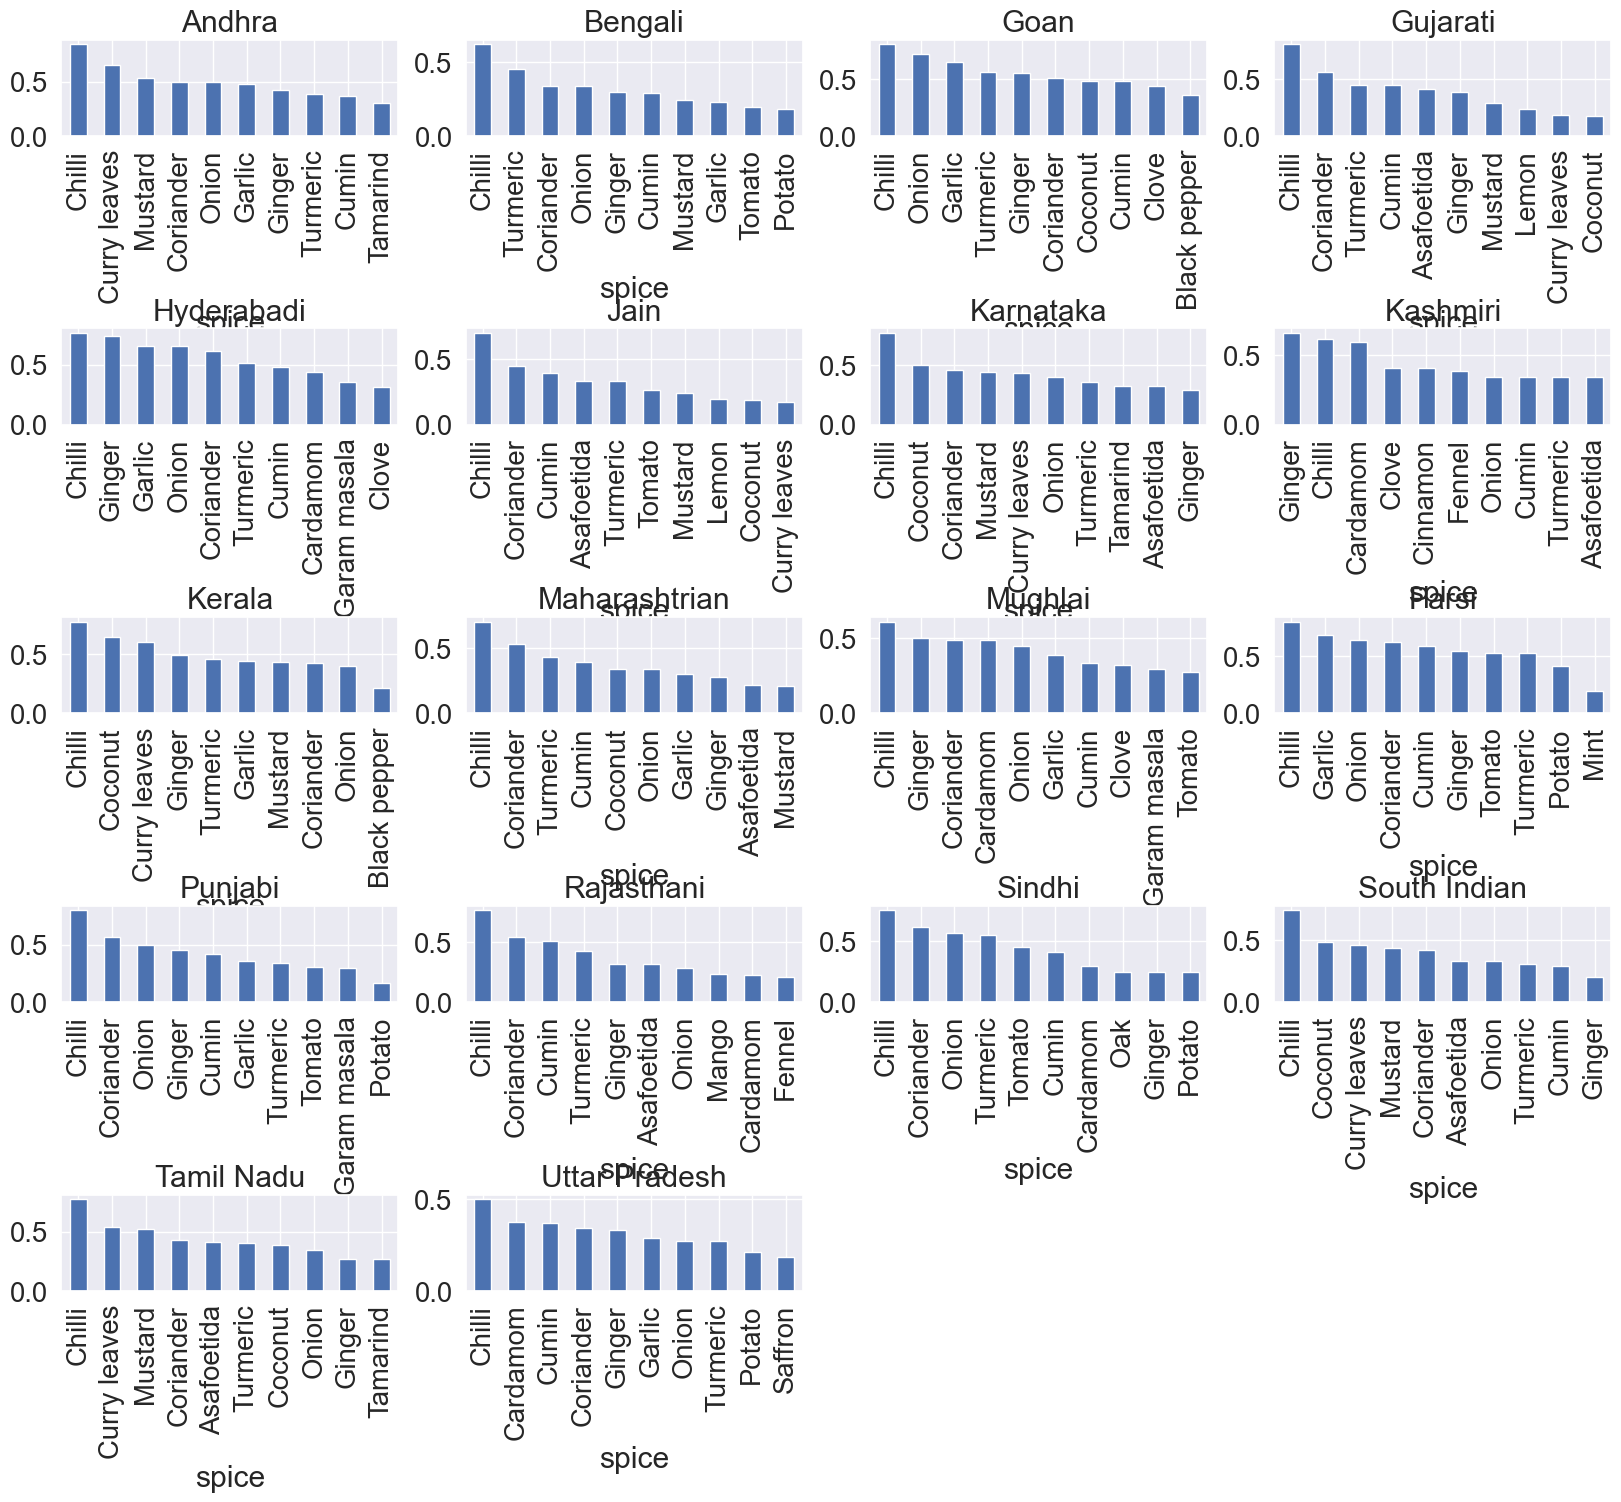

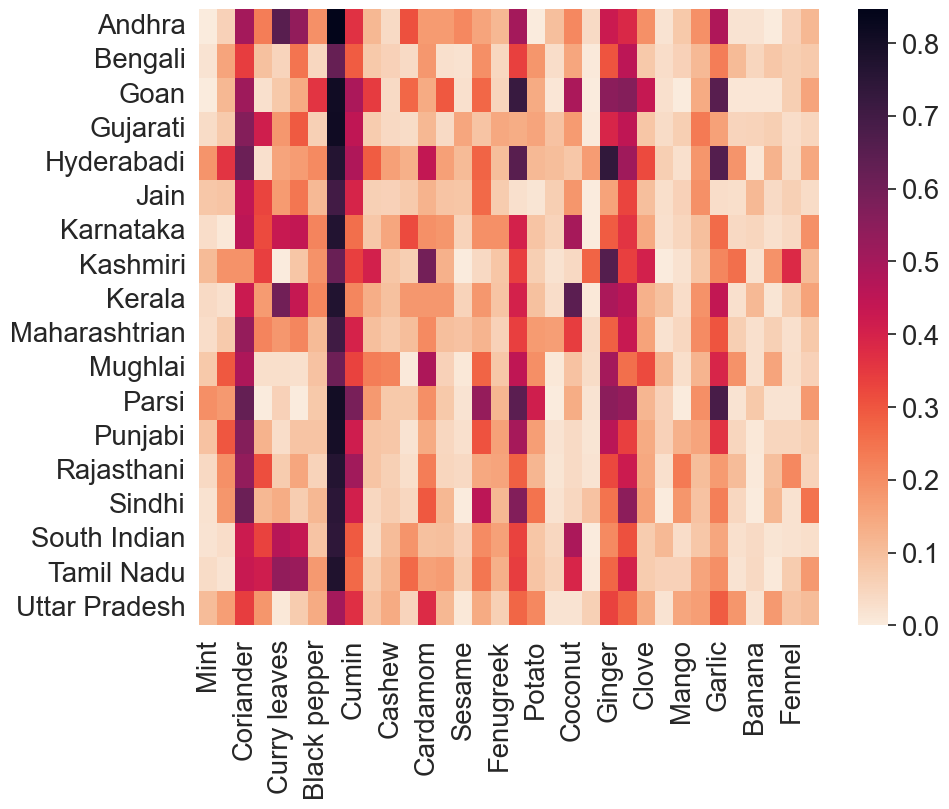

In [10]:
def plot_top_heatmap(region2ind,k, cmap= sns.cm.rocket_r):
    top_ind_list = []
    for i, ind in enumerate(region2ind.index):
        t = region2ind.loc[ind].sort_values(ascending = False)[:k]
        top_ind_list.extend(list(t.index))

    cluster_ind_df = pd.DataFrame(index=region2ind.index,  columns = list(set(top_ind_list)), dtype='float64')

    for i, ind in enumerate(region2ind.index):
        cluster_ind_df.loc[ind] = region2ind.loc[ind, cluster_ind_df.columns]

    sns.heatmap(cluster_ind_df, cmap= cmap)



def plot_prevalence(region2spiceingre_df_combined, no_subplot=[6,4]):
    fig = plt.figure(figsize= (20,20))
    fig.tight_layout()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)


    for i, ind in enumerate(region2spiceingre_df_combined.columns):
        t = region2spiceingre_df_combined[ind].sort_values(ascending = False)[:10] # find top spices
        ax = fig.add_subplot(no_subplot[0], no_subplot[1], i+1)
        t.plot.bar(ax=ax)


        plt.title(ind)
plot_prevalence(region2spiceingre_df_combined)

plt.figure(figsize =[10,8])
plot_top_heatmap(region2spiceingre_df_combined.T,15)
plt.savefig("../Figures/prevalence_topspices.png", bbox_inches = 'tight')

### find relative prevalence

In [11]:
def cal_relative_prev(region2spiceingre_df_combined):
    no_cuisine = len(region2spiceingre_df_combined.columns)

    avg = region2spiceingre_df_combined.sum(axis=1)

    temp = region2spiceingre_df_combined*no_cuisine
    relative_prev = temp.sub(avg, axis=0)/(no_cuisine-1)
    return relative_prev

relative_prev= cal_relative_prev(plotvar)

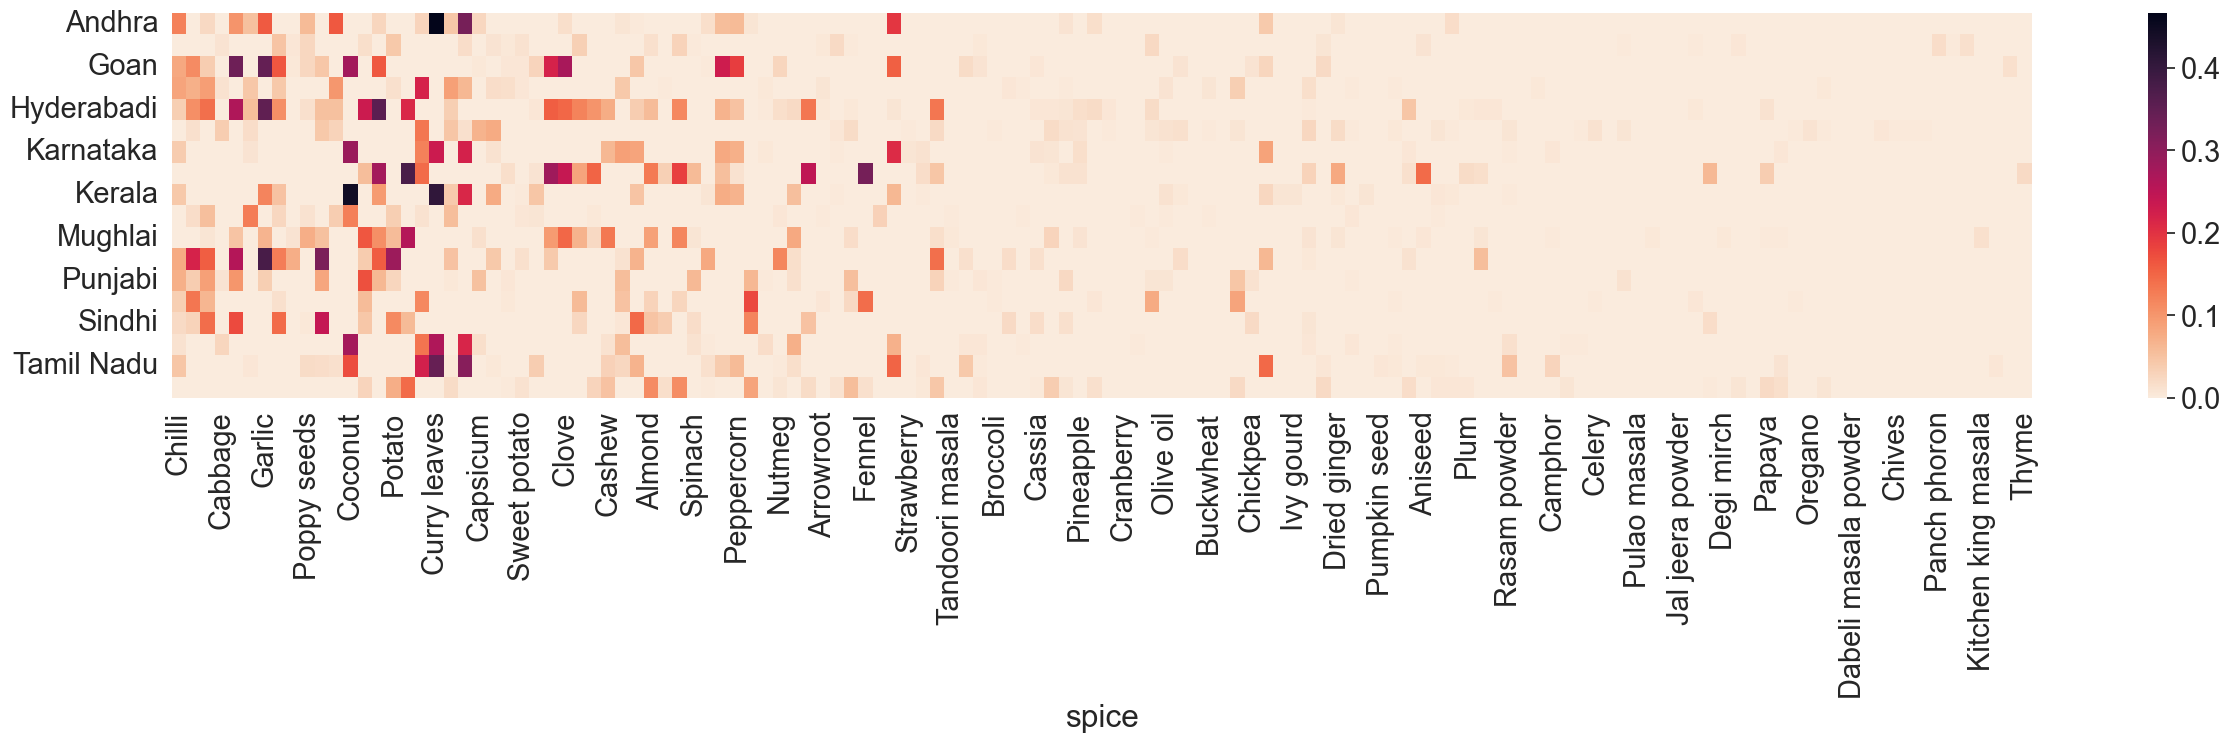

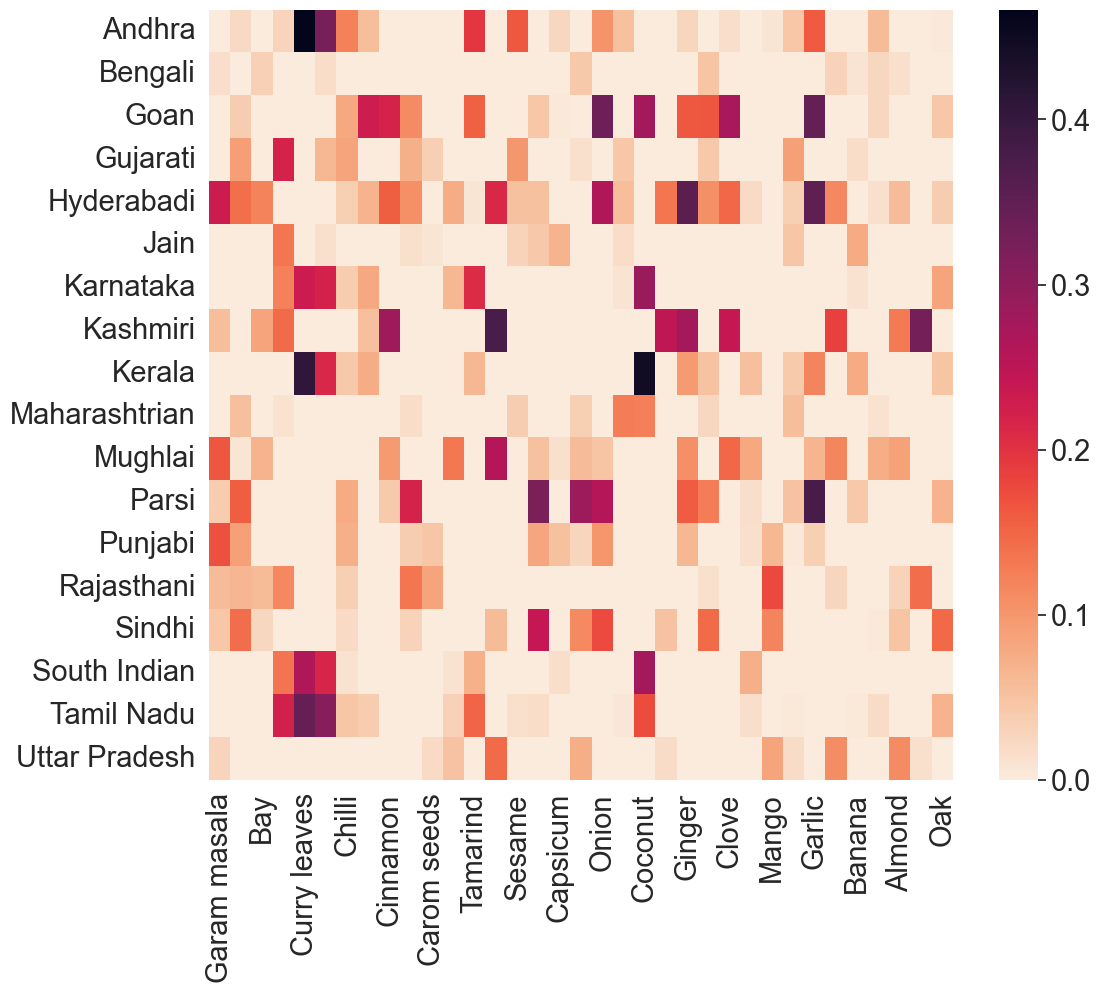

In [12]:
##. for visaulation, plot greater than 0 relative prevalnce

fig = plt.figure(figsize= (30,5))
sns.set(font_scale=1.9)
relative_prev[relative_prev<0] = 0
sns.heatmap(relative_prev.T,cmap = sns.cm.rocket_r)
plt.show()
plt.figure(figsize=[12,10])
plot_top_heatmap(relative_prev.T,5)
plt.savefig("../Figures/Authentic spices.png", bbox_inches = 'tight')